In [1]:
import os.path
path = '/Users/darionblakesley/Desktop/NSBP/galaxy_cluster_examples/Catalogs/TNG-100_3'
os.path.isdir(path) 

True

In [2]:
from pathlib import Path

my_file = Path('/Users/darionblakesley/Desktop/NSBP/galaxy_cluster_examples/Catalogs/TNG-100_3/outputs/')
my_file.is_dir()

True

In [10]:
import illustris_python as il

basePath = '/Users/darionblakesley/Desktop/NSBP/galaxy_cluster_examples/Catalogs/TNG-100_3/outputs' # Folder where snapshots and group catalogs are stored
snapshot_ind = 98

# Load header file
header = il.groupcat.loadHeader(basePath,snapshot_ind)
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
print("Header File Keys: ")
print('\n'.join(list(header.keys())))

# Load halo group quantities 
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind)
print("\nHalo Group File Keys: ")
print('\n'.join(list(halo_grp.keys())))

# You can also specify the fields when loading halos to load what you want
halo_grp_fields = ['GroupCM', 'GroupMass', 'Group_R_Crit200', 'Group_R_Mean200']
halo_grp = il.groupcat.loadHalos(basePath, snapshot_ind, fields=halo_grp_fields)

Header File Keys: 
BoxSize
FlagDoubleprecision
Git_commit
Git_date
HubbleParam
Ngroups_ThisFile
Ngroups_Total
Nids_ThisFile
Nids_Total
Nsubgroups_ThisFile
Nsubgroups_Total
NumFiles
Omega0
OmegaLambda
Redshift
Time

Halo Group File Keys: 
count
GroupBHMass
GroupBHMdot
GroupCM
GroupFirstSub
GroupGasMetalFractions
GroupGasMetallicity
GroupLen
GroupLenType
GroupMass
GroupMassType
GroupNsubs
GroupPos
GroupSFR
GroupStarMetalFractions
GroupStarMetallicity
GroupVel
GroupWindMass
Group_M_Crit200
Group_M_Crit500
Group_M_Mean200
Group_M_TopHat200
Group_R_Crit200
Group_R_Crit500
Group_R_Mean200
Group_R_TopHat200


<Figure size 432x288 with 0 Axes>

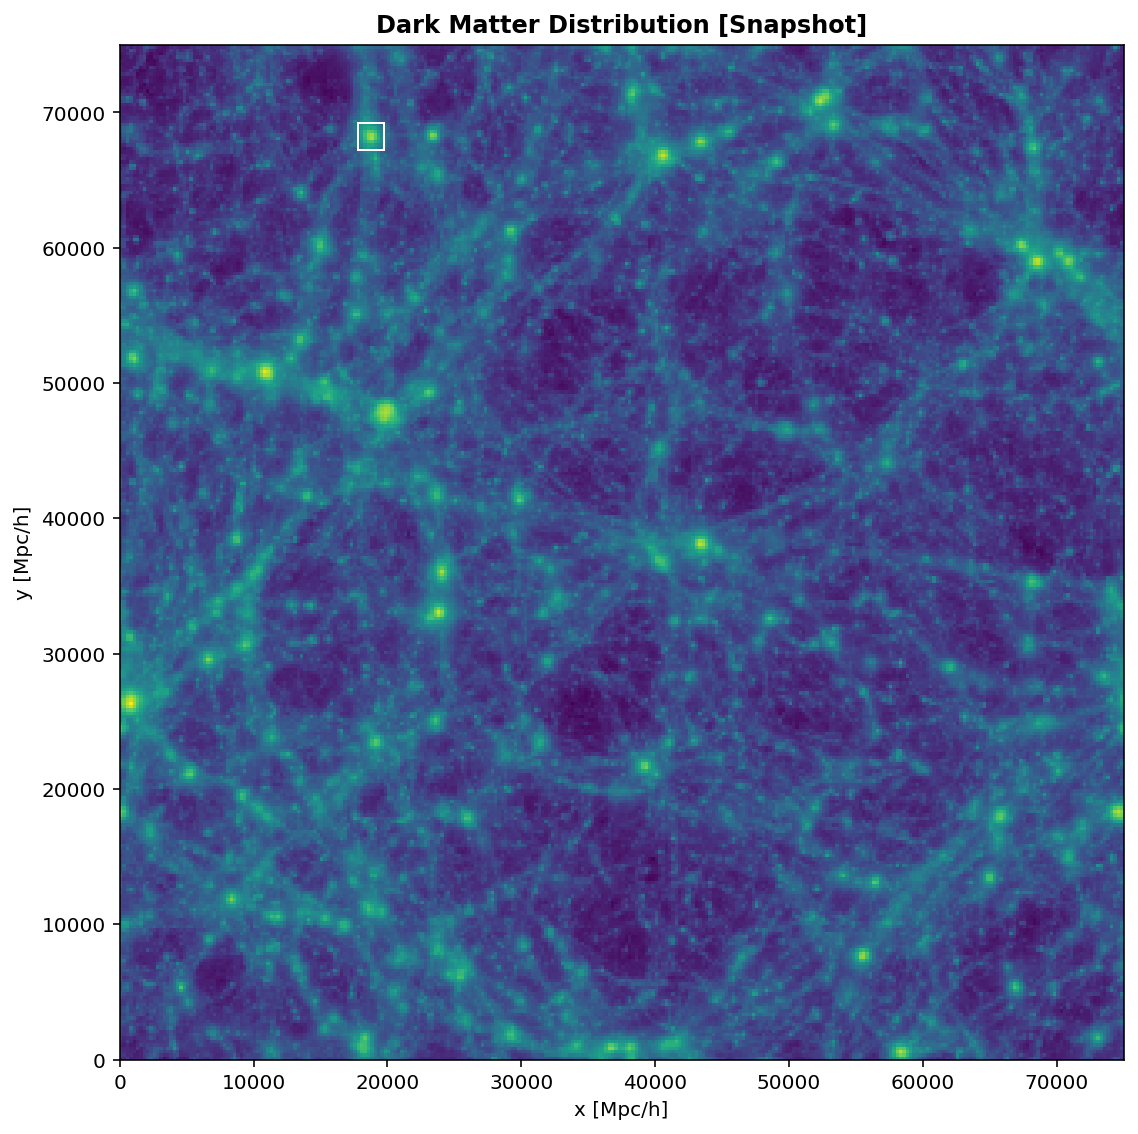

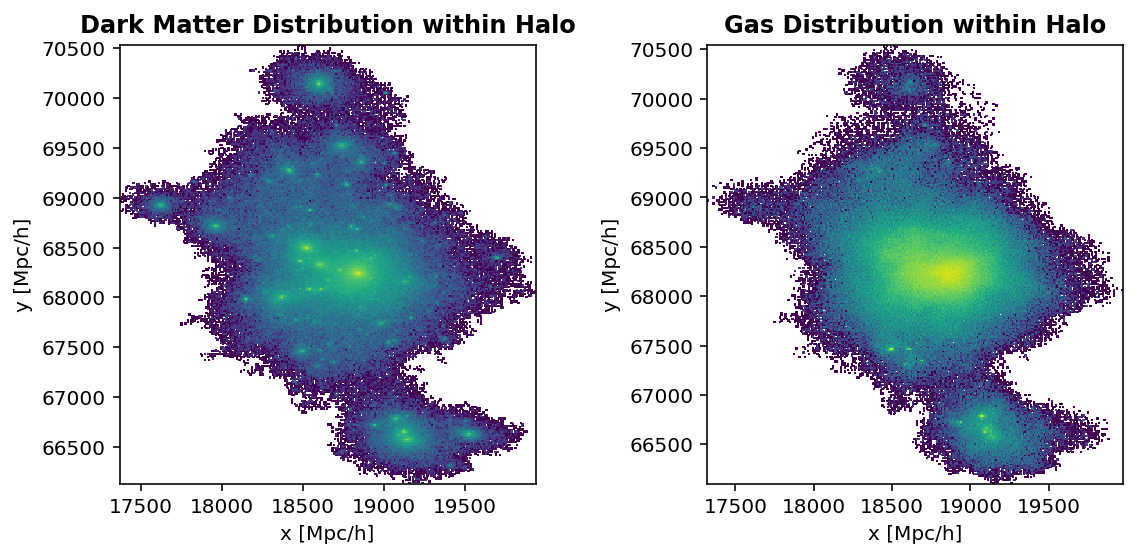

In [20]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

%config InlineBackend.figure_format ='retina'

# Choose index of halo to analze (sorted by increasing mass)
halo_ind = 5 
assert(halo_ind >= 0 and halo_ind < halo_grp['count']) 

halo_cm = halo_grp['GroupCM'][halo_ind]
halo_gas = il.snapshot.loadHalo(basePath, snapshot_ind, halo_ind, 'gas')
halo_dm = il.snapshot.loadHalo(basePath, snapshot_ind, halo_ind,'dm')


dm_pos = il.snapshot.loadSubset(basePath, snapshot_ind, 'dm', ['Coordinates'])
gas_pos = il.snapshot.loadSubset(basePath, snapshot_ind, 'gas', ['Coordinates'])
halo_gas_pos = halo_gas['Coordinates']
halo_dm_pos = halo_dm['Coordinates']
halo_R_Mean200 = halo_grp['Group_R_Mean200'][snapshot_ind]

# Plot dark matter distribution
plt.figure(1)
plt.figure(figsize=(8, 8))
plt.hist2d(gas_pos[:,0], gas_pos[:,1], norm=colors.LogNorm(), bins=300)

# Plot box around selected halo
#rec = plt.Rectangle((halo_cm[0]-1.5*halo_R_Mean200, halo_cm[1]-1.5*halo_R_Mean200), 
                    3*halo_R_Mean200, 3*halo_R_Mean200, ec="white", fill=None)
#plt.gca().add_patch(rec)

plt.xlim(np.array([0,75000]))
plt.ylim(np.array([0,75000]))
plt.xlabel('x [Mpc/h]')
plt.ylabel('y [Mpc/h]')
plt.title("Cluster Gas Distribution [Snapshot 98]", fontweight="bold")
plt.tight_layout()

# Plot gas and dark matter particle distributions within second halo
plt.figure(2)
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.hist2d(halo_dm_pos[:,0], halo_dm_pos[:,1], norm=colors.LogNorm(), bins=300)
plt.xlabel('x [Mpc/h]')
plt.ylabel('y [Mpc/h]')
plt.title("Dark Matter Distribution within Halo", fontweight="bold")

plt.subplot(1,2,2)
plt.hist2d(halo_gas_pos[:,0], halo_gas_pos[:,1], norm=colors.LogNorm(), bins=300)
plt.xlabel('x [Mpc/h]')
plt.ylabel('y [Mpc/h]')
plt.title("Gas Distribution within Halo", fontweight="bold")

plt.tight_layout()

[2.2400e+03 2.8160e+03 1.8082e+04 3.7097e+04 2.2510e+04 1.4338e+04
 1.0078e+04 6.8610e+03 4.1080e+03 2.5160e+03 1.5990e+03 1.0360e+03
 6.8800e+02 4.4100e+02 2.9100e+02 1.7200e+02 9.7000e+01 6.7000e+01
 3.2000e+01 2.5000e+01 2.1000e+01 5.0000e+00 7.0000e+00 4.0000e+00] 25 2789994740.7888317 582797795338795.4


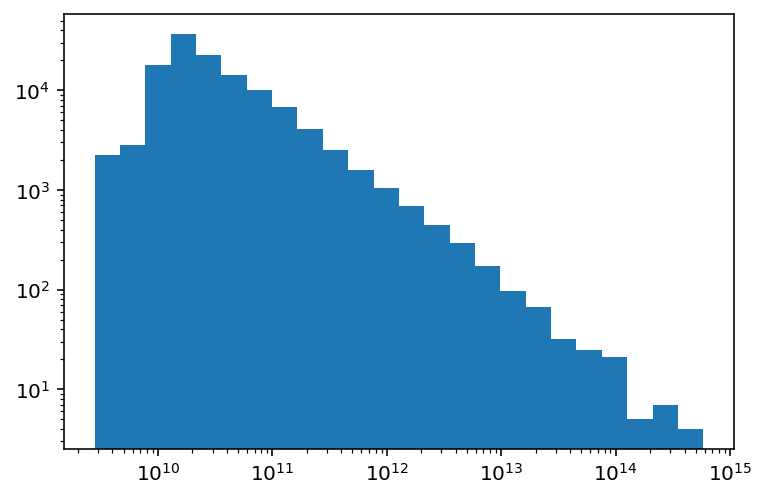

In [5]:
# visualizing the distribution of halo masses 
# note: plot axes are on log scale
h = 0.6774 #hubble expansion parameter
halo_masses = halo_grp['GroupMass']*10**10/h
[counts,bin_edges,c] = plt.hist (halo_masses, bins = np.logspace( np.log10(np.min(halo_masses)), np.log10(np.max(halo_masses)), 25))
plt.loglog()
print(counts,len(bin_edges),min(halo_masses),max(halo_masses))

In [13]:
# empty arrays to be used for storing halo indicies corresponding to halos of specified mass
halo_indicies_low = [] 
halo_indicies_high = []

In [14]:
#setting up mass bins for high mass halos

i=1
while len(halo_indicies_high)<500: # repeat loop until halo list includes at least 800 halos
    halo_indicies_high = np.where((halo_masses >= bin_edges[24-i]) & (halo_masses <= bin_edges[24]))[0] # add halo indicies of selected bin 
    i += 1 #increase loop index to include a larger number of bins to halo list until halo list


In [16]:
len(halo_indicies_high)

721

In [19]:
#setting up mass bins: low mass halos   

#low mass halos will have a mass between 1E10 and 1E11 mass units
halo_indicies_low = np.where((halo_masses >= 10**10.5) & 
                        (halo_masses <= 1E11))[0] #select all halo indicies such that the mass is in the specified range
indicies_low_subset = [] # create subset of indicies to be used for further steps 

while len(indicies_low_subset) < len(halo_indicies_high): #repeat loop until high and low mass halo counts equal
    proposed_index = np.random.choice(halo_indicies_low,1, replace=False)[0] #randomly draw values from low mass halo indicies 
   
    proposed_gas  = il.snapshot.loadHalo(basePath, snapshot_ind, proposed_index , 'gas') #load proposed halo data
    
    if (proposed_gas['count'] > 125) and not (proposed_index in indicies_low_subset): #ensure this halo has substantial gas particle count and has not been used before
        indicies_low_subset.append(proposed_index) #add halo index to a subset list if conditions are true
        print("length of list: ",len(indicies_low_subset))

length of list:  1
length of list:  2
length of list:  3
length of list:  4
length of list:  5
length of list:  6
length of list:  7
length of list:  8
length of list:  9
length of list:  10
length of list:  11
length of list:  12
length of list:  13
length of list:  14
length of list:  15
length of list:  16
length of list:  17
length of list:  18
length of list:  19
length of list:  20
length of list:  21
length of list:  22
length of list:  23
length of list:  24
length of list:  25
length of list:  26
length of list:  27
length of list:  28
length of list:  29
length of list:  30
length of list:  31
length of list:  32
length of list:  33
length of list:  34
length of list:  35
length of list:  36
length of list:  37
length of list:  38
length of list:  39
length of list:  40
length of list:  41
length of list:  42
length of list:  43
length of list:  44
length of list:  45
length of list:  46
length of list:  47
length of list:  48
length of list:  49
length of list:  50
length of

In [15]:
print('mass range of more massive halo comparison (units of 1E10 solar masses / h)')
sci_note_lower = "{:.2e}".format(bin_edges[24-(i-1)])
print('lower bound of halo mass: ',sci_note_lower)
sci_note_upper = "{:.2e}".format(bin_edges[24])
print('upper bound of halo mass: ' ,sci_note_upper)
print(i)


mass range of more massive halo comparison (units of 1E10 solar masses / h)
lower bound of halo mass:  3.54e+12
upper bound of halo mass:  5.83e+14
11


average halo masss for more massive subset 19653548119577.95 
 average halo masss for less massive subset 85327045189.72824


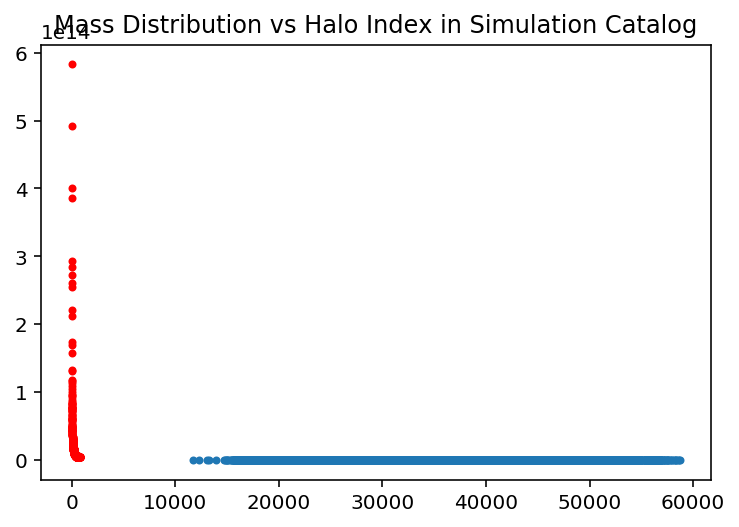

In [21]:
plt.plot(halo_indicies_low,halo_masses[halo_indicies_low],'.')
plt.plot(halo_indicies_high,halo_masses[halo_indicies_high],'r.')
plt.title('Mass Distribution vs Halo Index in Simulation Catalog')
print('average halo masss for more massive subset', sum(halo_masses[halo_indicies_high])/ len(halo_indicies_high), '\n', 'average halo masss for less massive subset', sum(halo_masses[indicies_low_subset])/ len(indicies_low_subset))

In [22]:
#taking subset of 'indicies low' such that each bin has the same number of samples
#halo_indicies_low =np.random.choice(halo_indicies_low,len(halo_indicies_high) , replace=False)

# initializing empty arrrays for halo-to-halo comparison    
density_high = np.array([], dtype=float)
temperature_high = np.array([], dtype=float)

density_low = np.array([], dtype=float)
temperature_low = np.array([], dtype=float)

#constants used for Temperature calculation
gamma = 5/3 #adiabadic index
ratio_EM = 1E10
x_h = 0.76
kb = 1.380649E-16 #boltzman constant in CGS
mp = 1.6726E-24  #mass of proton in grams


for halo_i in halo_indicies_high:
    #fetch gas data for specified halo indicies
    halo_gas = il.snapshot.loadHalo(basePath, snapshot_ind, halo_i, 'gas')
    
    #reading in density,internal energy and electron abundance arrays from halo_gas dictionary
    halo_density = halo_gas['Density']
    halo_u = halo_gas['InternalEnergy']
    halo_e_abundance = halo_gas['ElectronAbundance']
    
    #calculating temperatures of halo gas particles 
    mean_mol_weight = 4*mp  / (1 + 3*x_h + 4*x_h*halo_e_abundance) 
    halo_temperature = (gamma - 1) * (halo_u/kb) * mean_mol_weight * ratio_EM
    
    #append halo density and temp to larger halo arrays. 
    #these will be used for halo-to-halo comparison
    density_high = np.append(density_high, halo_density)
    temperature_high = np.append(temperature_high, halo_temperature)

#produce necesssary histogram data for low masss halos
for halo_i in indicies_low_subset:
    #fetch gas data for specified halo indicies
    halo_gas = il.snapshot.loadHalo(basePath, snapshot_ind, halo_i, 'gas')
    
    #reading density,internal energy and electron abundance from halo
    halo_density = halo_gas['Density']
    halo_u = halo_gas['InternalEnergy']
    halo_e_abundance = halo_gas['ElectronAbundance']
    
    #calculating temperatures of halo gas particles 
    mean_mol_weight = 4*mp  / (1 + 3*x_h + 4*x_h*halo_e_abundance) 
    halo_temperature = (gamma - 1) * (halo_u/kb) * mean_mol_weight * ratio_EM
    
    #append halo density and temp to larger halo arrays. 
    #these will be used for halo-to-halo comparison
    density_low = np.append(density_low, halo_density)
    temperature_low = np.append(temperature_low, halo_temperature)

[]

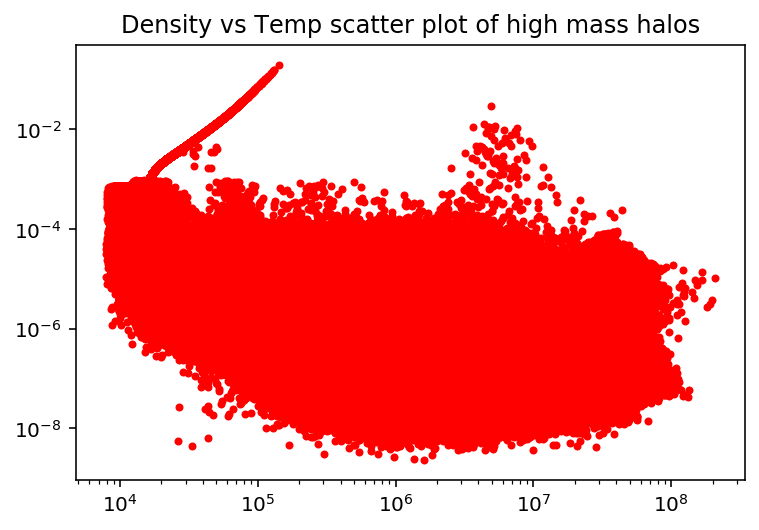

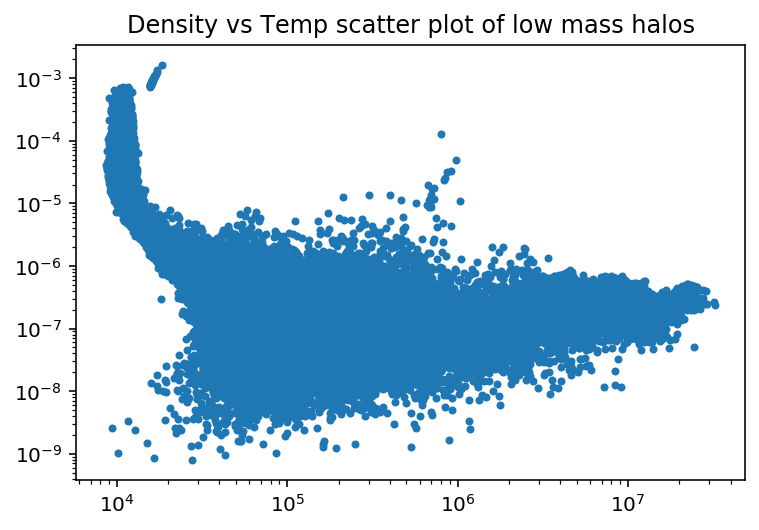

In [23]:
plt.plot(temperature_high,density_high,'r.')
plt.title('Density vs Temp scatter plot of high mass halos')
plt.loglog()
plt.figure()
plt.plot(temperature_low,density_low,'.')
plt.title('Density vs Temp scatter plot of low mass halos')
plt.loglog()

In [24]:
print('number of halos compared in high and low mass ranges:',len(halo_indicies_high),len(indicies_low_subset))
print('number of particles pertaning to high mass halos:', len(temperature_high),len(density_high))
print('number of particles pertaning to low mass halos:',len(temperature_low),len(density_low))

number of halos compared in high and low mass ranges: 721 721
number of particles pertaning to high mass halos: 14998885 14998885
number of particles pertaning to low mass halos: 101373 101373


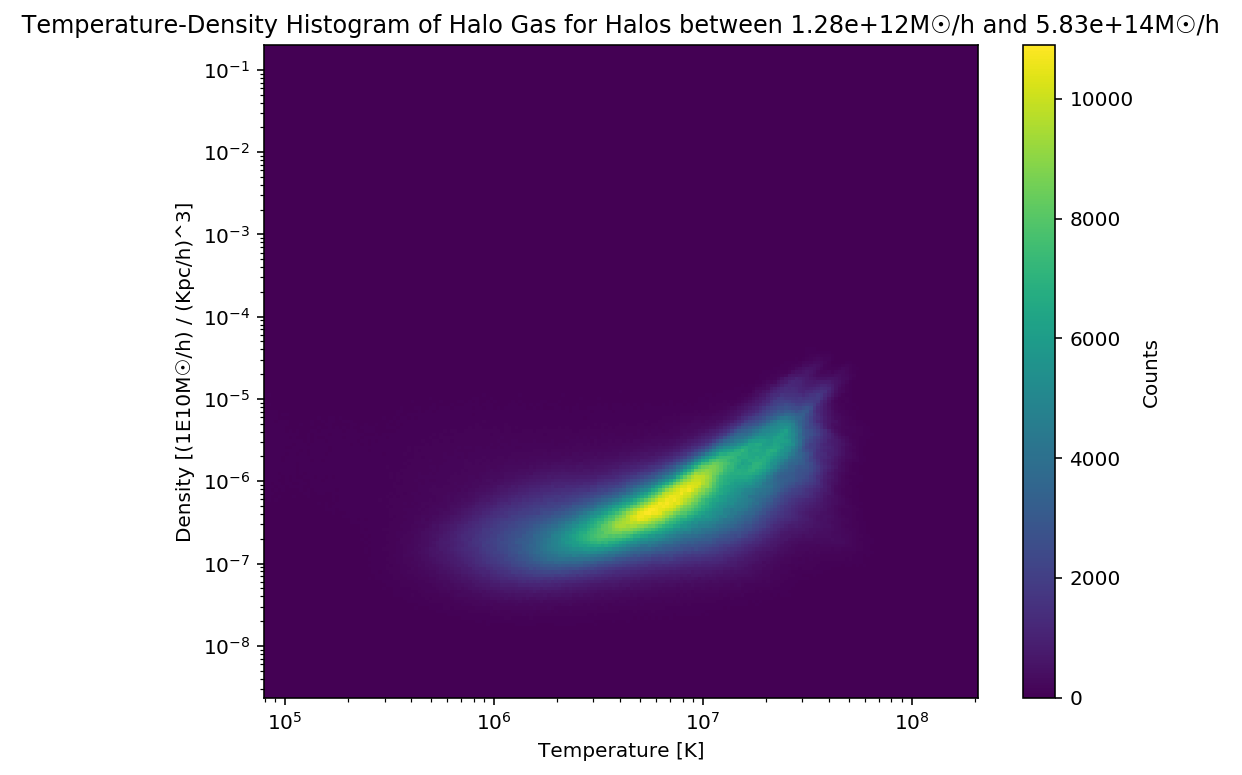

In [32]:
bin_x_h = np.logspace( np.log10(10*np.min(temperature_high)), np.log10(np.max(temperature_high)), 200)
bin_y_h = np.logspace( np.log10(np.min(density_high)), np.log10(np.max(density_high)), 200)  
plt.figure(figsize=(8,6))
plt.hist2d(temperature_high, density_high, bins = [bin_x_h,bin_y_h])
#plt.clim(0,13000)
plt.loglog()
plt.title(" Temperature-Density Histogram of Halo Gas for Halos between 1.28e+12M☉/h and 5.83e+14M☉/h ")
plt.ylabel('Density [(1E10M☉/h) / (Kpc/h)^3]')
plt.xlabel('Temperature [K]')
cbar = plt.colorbar()
cbar.set_label('Counts')

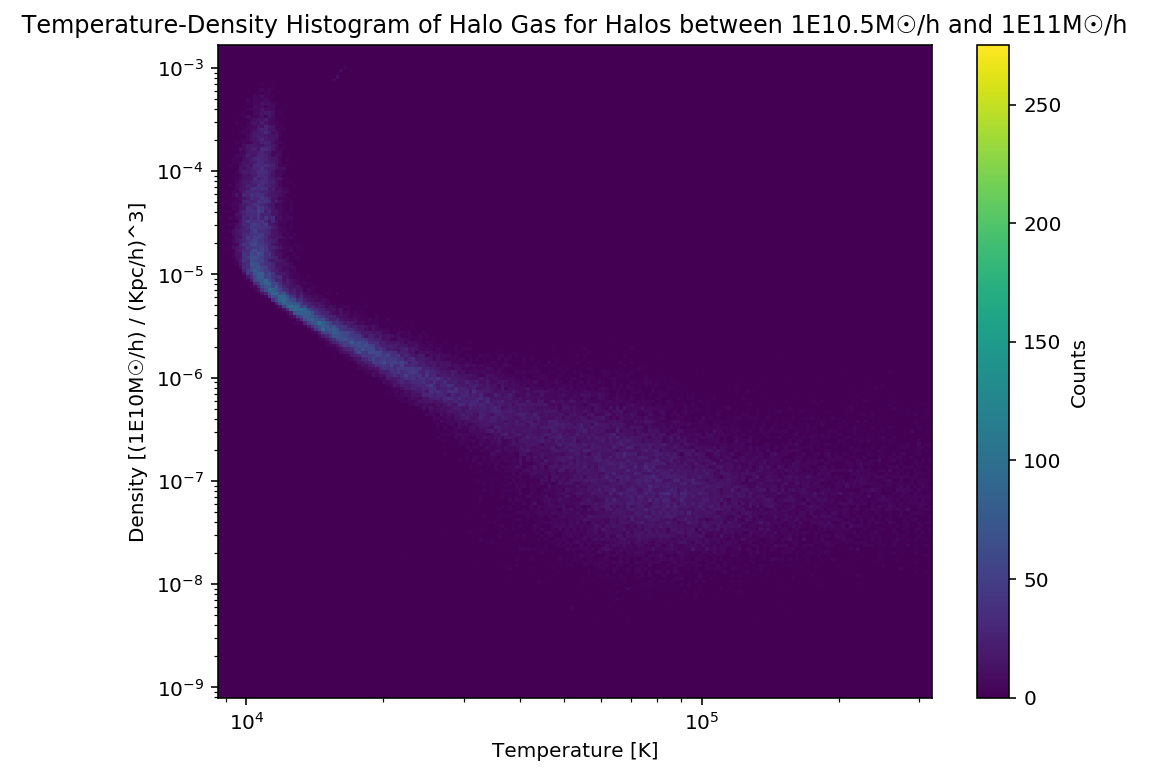

In [34]:
bin_x_l = np.logspace( np.log10(np.min(temperature_low)), np.log10(np.max(temperature_low)/101),200)
bin_y_l = np.logspace( np.log10(np.min(density_low)), np.log10(np.max(density_low)),200)  
plt.figure(figsize=(8,6))
plt.hist2d(temperature_low, density_low, bins = [bin_x_l,bin_y_l])
plt.clim(0,275)
plt.loglog()
plt.title(" Temperature-Density Histogram of Halo Gas for Halos between 1E10.5M☉/h and 1E11M☉/h ")
plt.ylabel('Density [(1E10M☉/h) / (Kpc/h)^3]')
plt.xlabel('Temperature [K]')
cbar = plt.colorbar()
cbar.set_label('Counts')